<div style="padding: 40px; border-radius: 10px; text-align: center;">
    <h1 style="font-size: 48px; font-weight: bold;">CREDIT RISK PREDICTION MODELS</h1>
    <p style="font-size: 24px; font-weight: bold; margin-top: 20px;"></p>
    <img src="https://images.pexels.com/photos/7821685/pexels-photo-7821685.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" alt="IMG" style="width: 650px; margin: 20px auto;">
</div>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

# Dataset

__Feature Name__ Description

* __person_age__ Age
* __person_incomeAnnual__ Annual income
* __person_home_ownership__ Type of home ownership [Rent, Mortgage, Own, Other]
* __person_emp_length__ Employment length (in years)
* __loan_intent__ Intent behind loan
* __loan_grade__ Loan grade based on credit [A-G]
* __loan_amnt__ Loan amount
* __loan_int_rate__ Interest rate for the loan
* __loan_status__ Loan status [0 is non default 1 is default]
* __loan_percent_income__ Percentage of income
* __cb_person_default_on_file__ Historical default [Y, N]
* __cb_preson_cred_hist_length__ Credit history length

In [2]:
df = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Exploratory Analysis

In [3]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df.duplicated().sum()

165

In [7]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


# Visualization

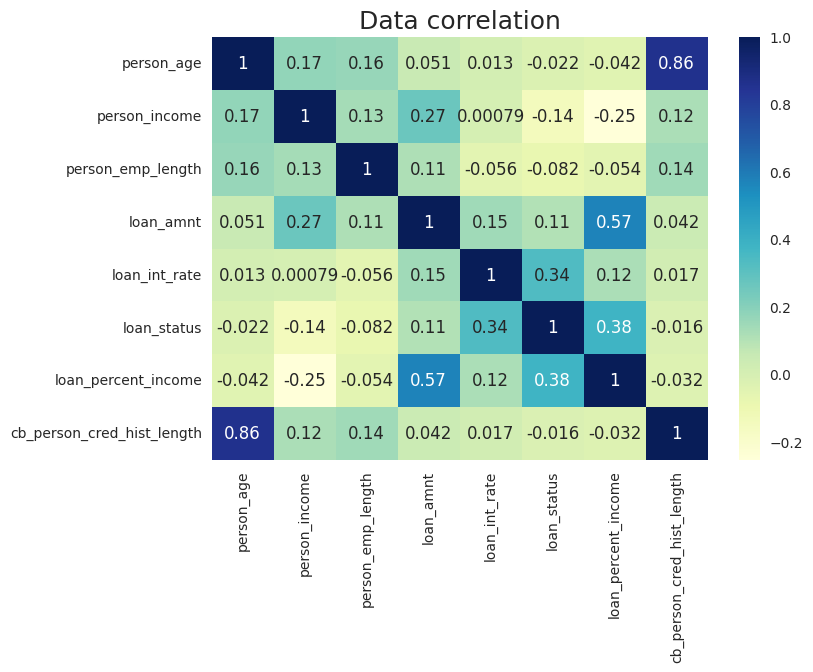

In [8]:
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True)
plt.title('Data correlation', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Loan Status')

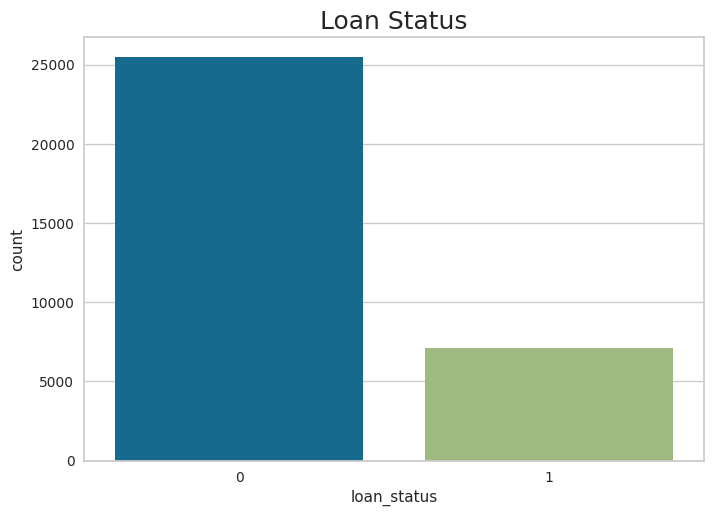

In [9]:
sns.countplot(x=df['loan_status'])
plt.title('Loan Status', fontsize=18)

Text(0.5, 1.0, 'Home ownership')

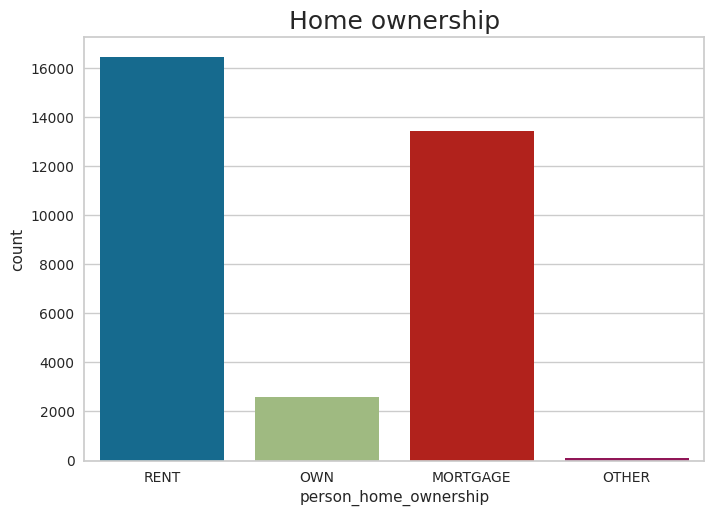

In [10]:
sns.countplot(x=df['person_home_ownership'])
plt.title('Home ownership', fontsize=18)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


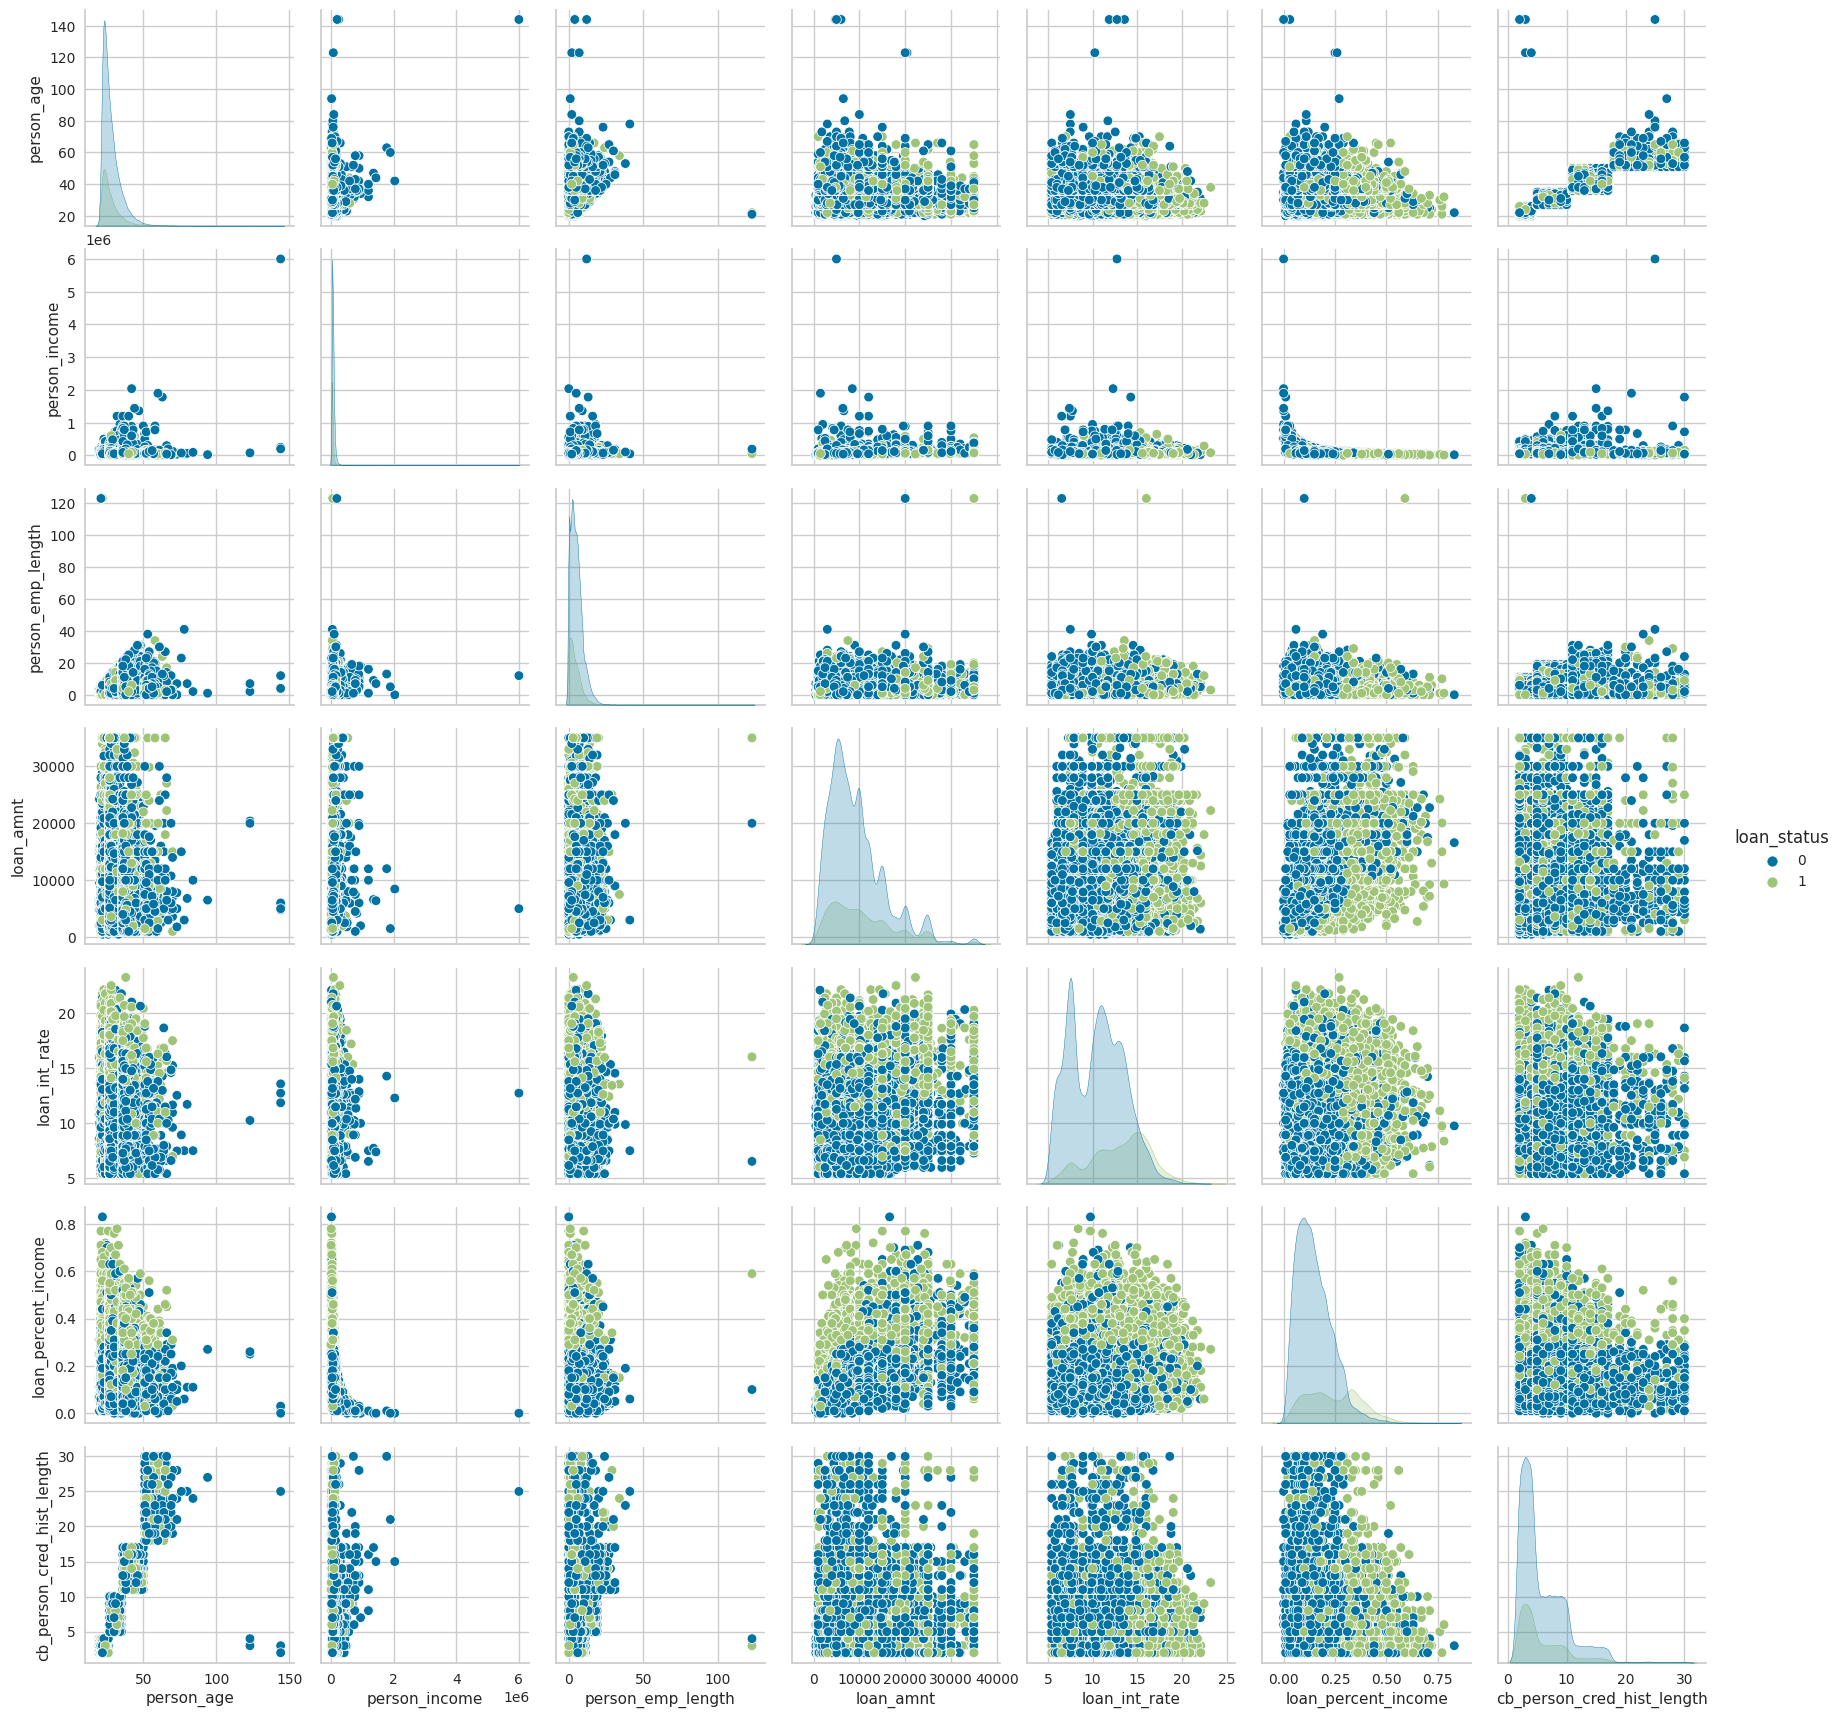

In [11]:
sns.pairplot(df, hue='loan_status')

# Data Cleaning

In [12]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Filling missing values with mean:

In [13]:
df.loc[df['loan_int_rate'].isnull(), 'loan_int_rate'] = df['loan_int_rate'].median()
df.loc[df['person_emp_length'].isnull(), 'person_emp_length'] = df['person_emp_length'].median()

In [14]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Finding outliers

In [15]:
df['person_age'].max()

144

Assuming individuals with age > 90 to be errors

In [16]:
df = df.loc[df['person_age'] < 90]

In [17]:
df['person_emp_length'].max()

123.0

Employment cannot be greater than the individual's age (accounting for childhood)

In [18]:
df = df.loc[df['person_emp_length'] < df['person_age'] - 10]

## Creating groups

In [19]:
df['income_group'] = pd.cut(df['person_income'], bins=
                           [0, 25000, 50000, 75000, 100000, float('inf')],
                           labels=['low', 'l-middle', 'middle', 'h-middle', 'high'])

In [20]:
df['income_group']

1             low
2             low
3          middle
4          middle
5             low
           ...   
32576      middle
32577        high
32578    h-middle
32579        high
32580    l-middle
Name: income_group, Length: 32573, dtype: category
Categories (5, object): ['low' < 'l-middle' < 'middle' < 'h-middle' < 'high']

In [21]:
df['loan_amnt_group'] = pd.cut(df['loan_amnt'], bins=
                                 [0, 10000, 15000, float('inf')],
                                 labels=['small', 'medium', 'large'])

In [22]:
df['loan_amnt_group']

1         small
2         small
3         large
4         large
5         small
          ...  
32576     small
32577     large
32578     large
32579    medium
32580     small
Name: loan_amnt_group, Length: 32573, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

In [23]:
df['loan_to_income'] = df['loan_amnt'] / df['person_income']
df['loan_to_income']

1        0.104167
2        0.572917
3        0.534351
4        0.643382
5        0.252525
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: loan_to_income, Length: 32573, dtype: float64

# Data Processing and Encoding

In [24]:
y_credit = df['loan_status']
X_credit = df.drop(['loan_status'], axis=1)

In [25]:
X_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'income_group', 'loan_amnt_group',
       'loan_to_income'],
      dtype='object')

In [26]:
label_encode_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'income_group', 'loan_amnt_group']
label_encoder = LabelEncoder()

for col in label_encode_cols:
    X_credit[col] = label_encoder.fit_transform(X_credit[col])
    
X_credit = pd.get_dummies(X_credit, columns=label_encode_cols)

In [27]:
X_credit.head(1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income,person_home_ownership_0,person_home_ownership_1,...,cb_person_default_on_file_0,cb_person_default_on_file_1,income_group_0,income_group_1,income_group_2,income_group_3,income_group_4,loan_amnt_group_0,loan_amnt_group_1,loan_amnt_group_2
1,21,9600,5.0,1000,11.14,0.1,2,0.104167,False,False,...,True,False,False,False,False,True,False,False,False,True


In [28]:
scaler = StandardScaler()
X_credit = scaler.fit_transform(X_credit)

In [29]:
X_credit[0]

array([-1.08431905, -1.07135424,  0.06011078, -1.35882993,  0.04235685,
       -0.65757719, -0.93862187, -0.62027139, -0.83817674, -0.05740867,
        3.40670664, -1.00953181, -0.43645173,  2.01228593, -0.35277141,
       -0.47857149, -0.45166294, -0.46133602, -0.70312158,  1.45520795,
       -0.49713938, -0.3538708 , -0.17463574, -0.08633606, -0.04436987,
        0.46270583, -0.46270583, -0.40900104, -0.38490188, -0.74434894,
        3.49258302, -0.64744047, -0.42205715, -0.48113759,  0.71642421])

In [30]:
X_training, X_test, y_training, y_test = train_test_split(X_credit, y_credit, test_size= 0.2, random_state=0)

In [31]:
X_training.shape, y_training.shape

((26058, 35), (26058,))

# Over sampling

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_credit, y_credit)

In [34]:
X_training_o, X_test_o, y_training_o, y_test_o = train_test_split(X_over, y_over, test_size = 0.2, stratify=y_over)

# Prediction models:

# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
naive_bayer = GaussianNB()
naive_bayer.fit(X_training, y_training)

GaussianNB()

### over sample

In [37]:
naive_bayer_o = GaussianNB()
naive_bayer_o.fit(X_training_o, y_training_o)

GaussianNB()

In [38]:
predict_NB = naive_bayer.predict(X_test)
predict_NB_o = naive_bayer_o.predict(X_test_o)

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
decision_tree.fit(X_training, y_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
predict_decision_tree = decision_tree.predict(X_test)

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
random_forest = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state =0)
random_forest.fit(X_training, y_training)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [44]:
predict_random_forest = random_forest.predict(X_test)

# Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_training, y_training)

KNeighborsClassifier(n_neighbors=20)

In [47]:
predict_knn = knn.predict(X_test)

# Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_training, y_training)

LogisticRegression(random_state=1)

In [50]:
logistic.intercept_

array([-1.91329537])

# SVM

In [51]:
from sklearn.svm import SVC

In [52]:
svm = SVC(kernel='rbf', random_state=1, C=2)
svm.fit(X_training, y_training)

SVC(C=2, random_state=1)

# Neural Network

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
neural_network = MLPClassifier(max_iter=240, tol=0.0000100)
neural_network.fit(X_training, y_training)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=240, tol=1e-05)

# Results

## Naive Bayes - 82.71%

0.827168073676132

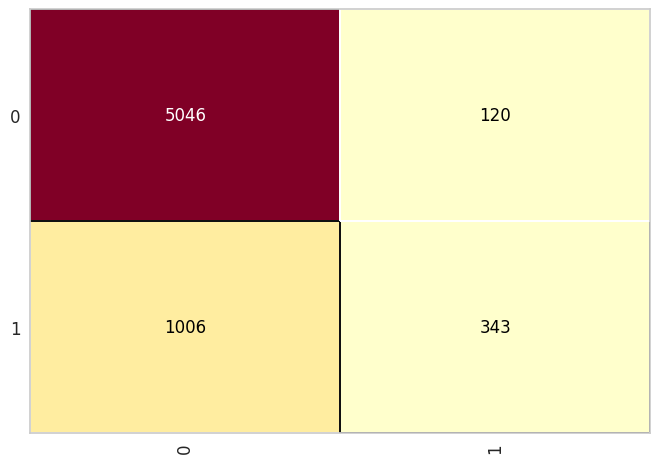

In [55]:
cm = ConfusionMatrix(naive_bayer)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

### Over sampling - 77.54%

In [56]:
accuracy_score(predict_NB_o, y_test_o)

0.7830568371453813

## Decision Tree - 89.40%

0.8940905602455871

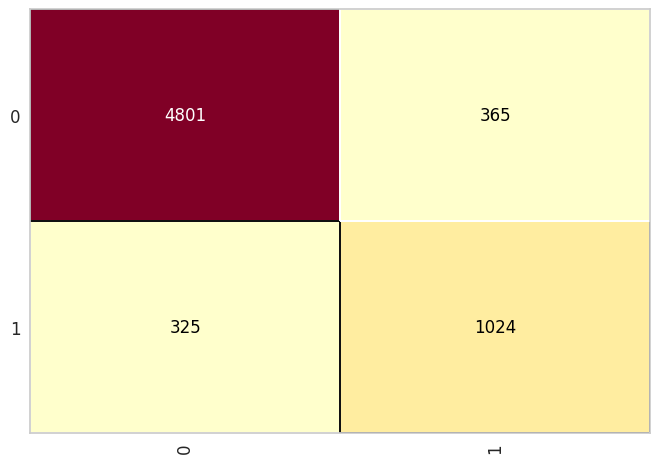

In [57]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

## Random Forest - 93.70%

0.9370683039140445

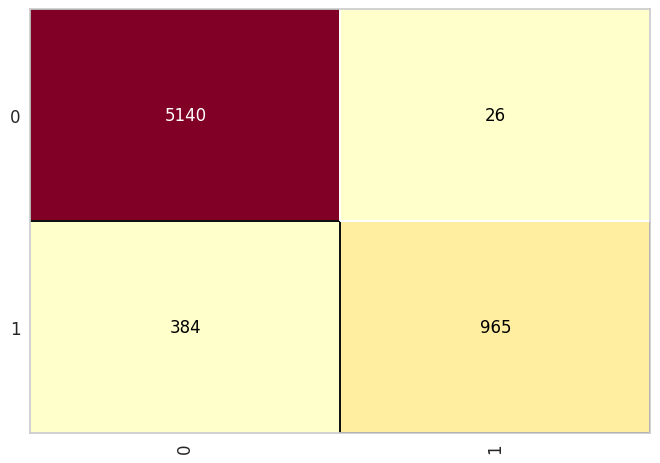

In [58]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

## Nearest Neighbors - 89.22%

0.8922486569455104

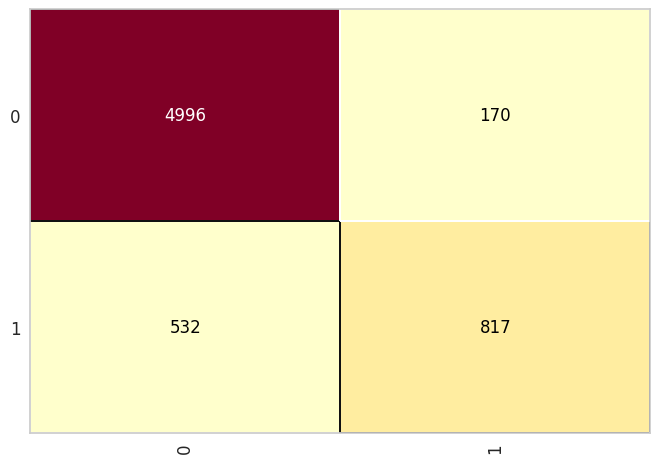

In [59]:
cm = ConfusionMatrix(knn)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

## Logistic regression - 87.26%

0.8726016884113584

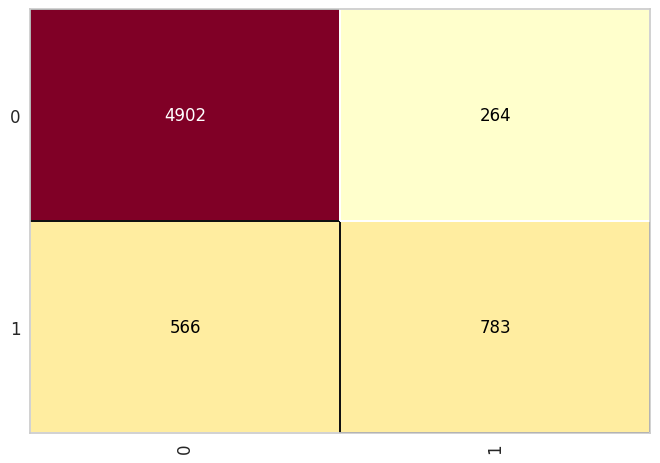

In [60]:
cm = ConfusionMatrix(logistic)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

## SVM - 91.45%

0.9145049884881044

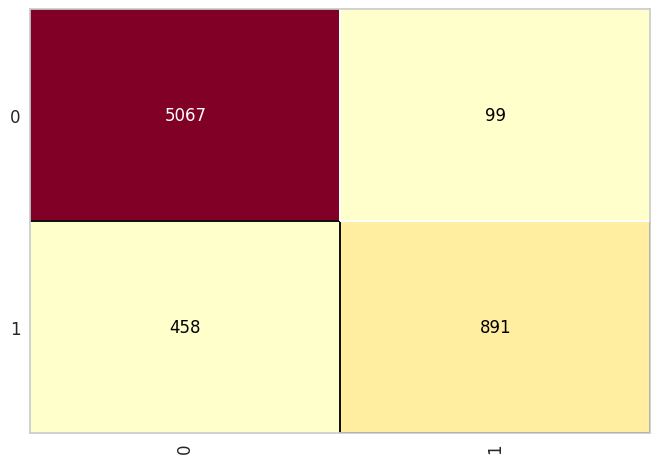

In [61]:
cm = ConfusionMatrix(svm)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

## Neural Network - 91.57%

0.918495778971604

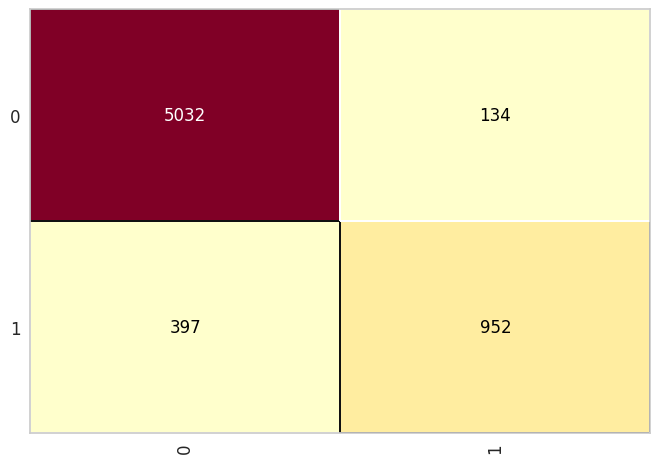

In [62]:
cm = ConfusionMatrix(neural_network)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)